### **Telecommunication Churn Prediction - Project Overview**  

* This project aims to predict whether a customer will leave (churn) a telecom company based on their usage patterns and service details. The dataset includes information like call duration, number of calls, charges for different times of the day (day, evening, night, international), and whether the customer has a voice or international plan. It also tracks how often they contact customer service.  

* By analyzing this data, we can find patterns that indicate why customers leave. Using machine learning, we will build a model to predict churn, helping the company take action to retain customers before they decide to leave.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data from an EXCEL file.

In [2]:
# Reading the dataset
df = pd.read_excel("/content/Churn.xlsx", sheet_name=0)
df.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


# Performing Basic and Necessary EDA

In [3]:
df.shape

(5000, 21)

We have 5000 rows and 21 columns.

In [4]:
df.columns

Index(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge',
       'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'churn'],
      dtype='object')

These are the names of the column we'll be working with.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

* We have 7 object type column, 8 int type column and 6 float type column.
* Apparently we have no null values.
* Also it seems we have one unecessary column.

In [6]:
# Dropping the unnamed column
df.drop(columns='Unnamed: 0', inplace=True)

In [7]:
# let's check for inconsistency in voice.plan and voice.messages
df.groupby('voice.plan')['voice.messages'].sum()

,voice.messages
voice.plan,
no,0
yes,38776


* We can see there aren't any voice.messages for the people who have not opted voice.plan, which is obvious
* Therefore we can say these two columns have consistent data points

In [8]:
# Confirming if we have any null values
df.isnull().sum()

,0
state,0
area.code,0
account.length,0
voice.plan,0
voice.messages,0
intl.plan,0
intl.mins,0
intl.calls,0
intl.charge,0
day.mins,0


Apparently we don't have any null values.

In [9]:
# Let's check for any inconsistency in object columns
for col in df.columns:
    if df[col].dtype == object:
        print(col)
        print(df[col].unique(),"\n")

state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] 

area.code
['area_code_415' 'area_code_408' 'area_code_510'] 

voice.plan
['yes' 'no'] 

intl.plan
['no' 'yes'] 

day.charge
[45.07 27.47 41.38 ... 32.08 1.22 28.9] 

eve.mins
[197.4 195.5 121.2 ... 302.3 280.6 340.3] 

churn
['no' 'yes'] 



* We can observe there are some inconsistencies.
* For the day.charge and eve.mins columns, they are in string format where as it should be in float format.

In [10]:
# Changing the datatype of the 2 columns
df[['day.charge', 'eve.mins']] = df[['day.charge', 'eve.mins']].astype(float)

In [11]:
# Let's check now for null vlaues again
df.isnull().sum()

,0
state,0
area.code,0
account.length,0
voice.plan,0
voice.messages,0
intl.plan,0
intl.mins,0
intl.calls,0
intl.charge,0
day.mins,0


* After converting those 2 columns in numerical we can observe few null vlaues.
* Since the numer of null vlaues are not that huge it will not affect the dataset
* So we will be removing them.
* **Alternatively :** We could fill those null values with the mean of the column and retain them.

In [12]:
print("Before Removing: ", df.shape)
df.dropna(inplace=True)
print("After Removing: ", df.shape)

Before Removing:  (5000, 20)
After Removing:  (4969, 20)


In [13]:
# Let's check for duplicates
df.duplicated().sum()

0

There are no dulicated rows.

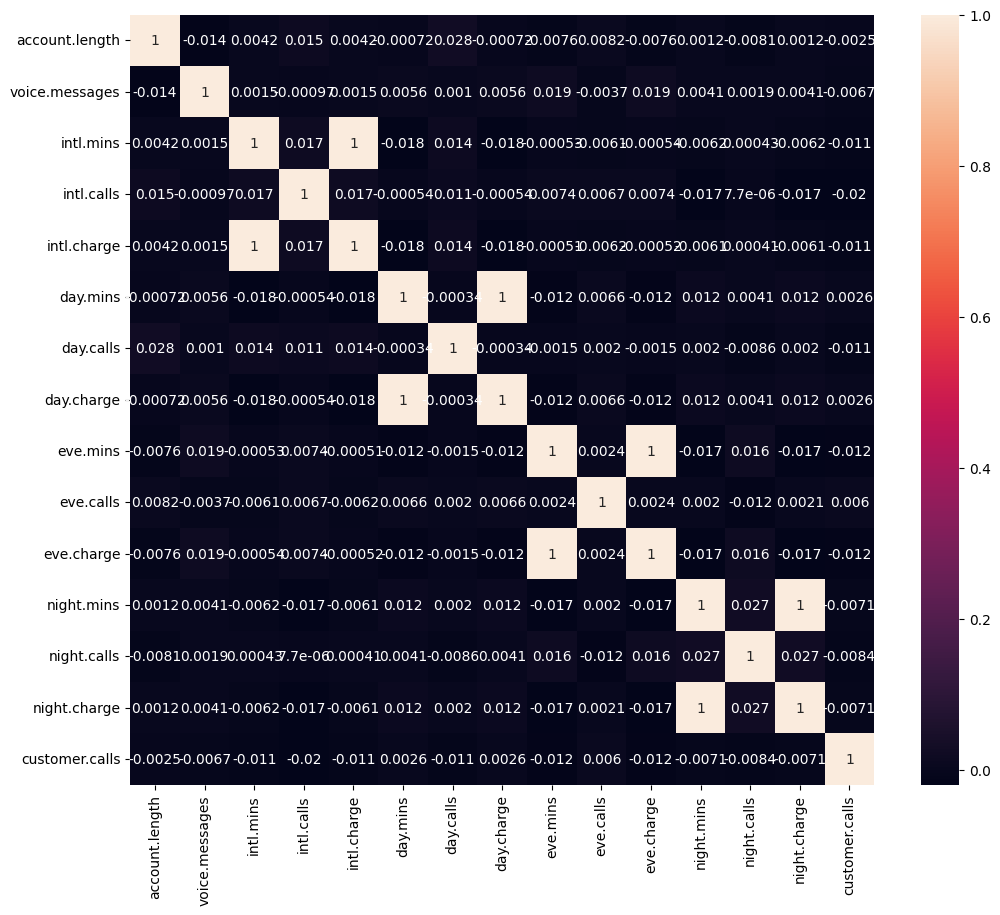

In [14]:
# let's find the correlation of all the columns
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

* We can see some of the columns are highly correlated.
* ['intl.mins', 'intl.charge'] obvoiusly as the minutes in the call increases charges will also increase
* Same goes for ['day.charge', 'day.mins'], ['eve.charge','eve.mins'] and ['night.charge','night.mins'].
* It is pointless to include all the 4 pairs since it doesn't bring any additional information for model training.
* Since the dataset is related to churn we will retain all the columns which indicates the use of service i.e use of the service in minutes.
* Also the chrages are derived columns and they are redundant so we'll not be retaining them.

#  Feature Engineering

In [15]:
#creating a new column called total charges payed by the customer
df['total.charge'] = df['intl.charge']+df['day.charge']+df['eve.charge']+df['night.charge']

# dropping redundant columns
df.drop(['intl.charge','day.charge','eve.charge','night.charge'], axis=1, inplace=True)

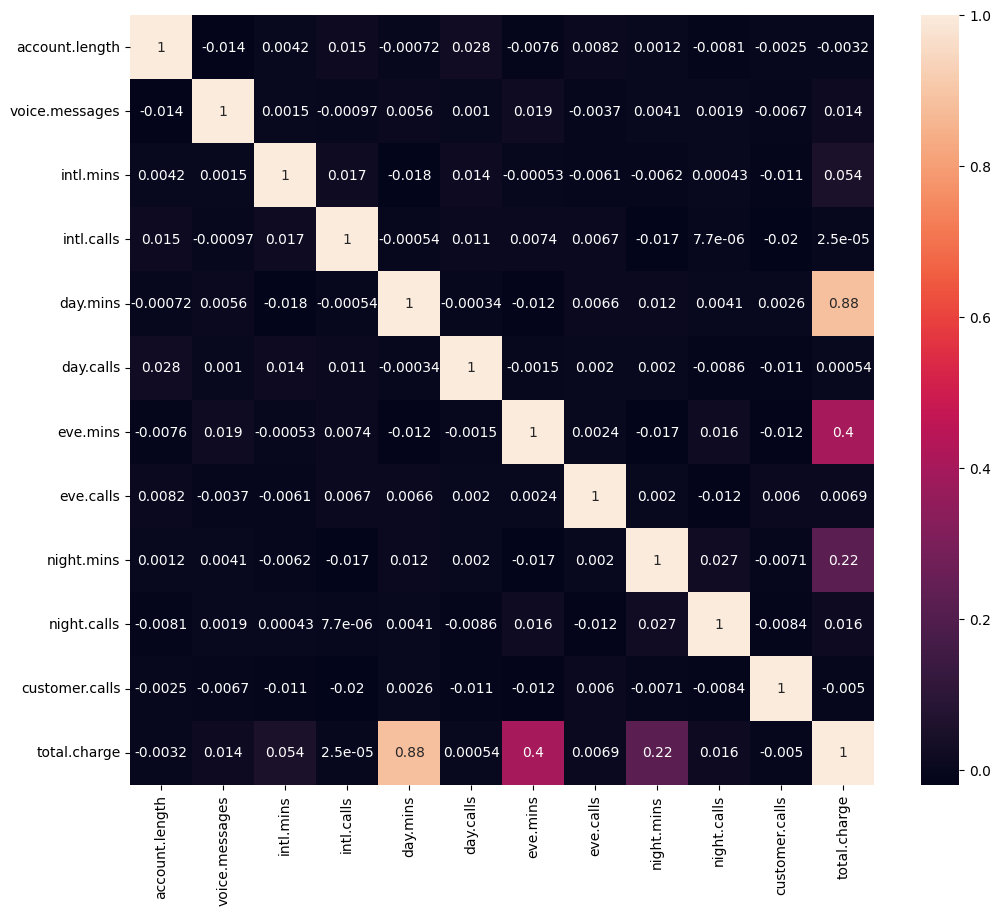

In [16]:
# Let's check the correlation again for the new column we added
# let's find the correlation of all the columns
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [17]:
# Let's separate numerical and categorcial columns
col = (df.dtypes == object)
obj_cols = (col[col] == True).index

col = (df.dtypes != object)
num_cols = (col[col] == True).index

obj_cols, num_cols

(Index(['state', 'area.code', 'voice.plan', 'intl.plan', 'churn'], dtype='object'),
 Index(['account.length', 'voice.messages', 'intl.mins', 'intl.calls',
        'day.mins', 'day.calls', 'eve.mins', 'eve.calls', 'night.mins',
        'night.calls', 'customer.calls', 'total.charge'],
       dtype='object'))

In [18]:
# Let's detect any outliers if we have in any of the numerical columns.

# Function to identify outliers using the capping method
def detect_outliers(column):                                                   #function definition takes columns as input
    Q1 = df[column].quantile(0.25)                                             # defining 25% of the column values
    Q3 = df[column].quantile(0.75)                                             # defiining 75% of the column values
    IQR = Q3 - Q1                                                              # Defining Inter Quartile Range
    lower_bound = Q1 - 1.5 * IQR                                               # Finding lower bound
    upper_bound = Q3 + 1.5 * IQR                                               # Finding upper bound
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]     # identifying outlier i.e data points below lower_bound and data points above upper_bound
    return outliers                                                            # return those points only

# Check for outliers in each column and summarize
outlier_summary = {}                                      # dictionary to hold the number of outlier in each column
for column in num_cols:                                   # running the loop through all the columns in DataFrame
    outliers = detect_outliers(column)                    # Calling the function
    outlier_summary[column] = len(outliers)               # updating dictionary

# Display the outlier counts for each column
print("Total Number of outliers: ",sum(outlier_summary.values()),"\n")
outlier_summary

Total Number of outliers:  943 



{'account.length': 24,
 'voice.messages': 60,
 'intl.mins': 71,
 'intl.calls': 118,
 'day.mins': 34,
 'day.calls': 35,
 'eve.mins': 43,
 'eve.calls': 34,
 'night.mins': 40,
 'night.calls': 43,
 'customer.calls': 398,
 'total.charge': 43}

* We can see the total number of outliers are 943 based on IQR capping method.
* customer.calls having the most number of outliers.
* account.length having the least number of outliers.

In [19]:
# to check number of churners and non-churners
df['churn'].value_counts()

,count
churn,
no,4264
yes,705


In [20]:
# To group data and compute mean to check if churners make more service call than non-churners
df.groupby('churn')['customer.calls'].mean()

,customer.calls
churn,
no,1.458490
yes,2.258156


Yes! Perhaps unsurprisingly, churners seem to make more customer service calls than non-churners.

In [21]:
# to find out if one state has more churners
df.groupby('state')['churn'].value_counts()

state  churn
AK     no        65
       yes        5
AL     no       110
       yes       13
AR     no        76
               ... 
WI     yes        8
WV     no       136
       yes       22
WY     no       104
       yes       11
Name: count, Length: 102, dtype: int64

Alabana has more customer when compared to other state as a result more number of churners are there in Alabana i.e 13

In [22]:
#group churn to check if churners make most international call comapred to non churners
df.groupby('churn')['intl.calls'].max()

,intl.calls
churn,
no,19
yes,20


There's no major difference between churners intl  call and non churners

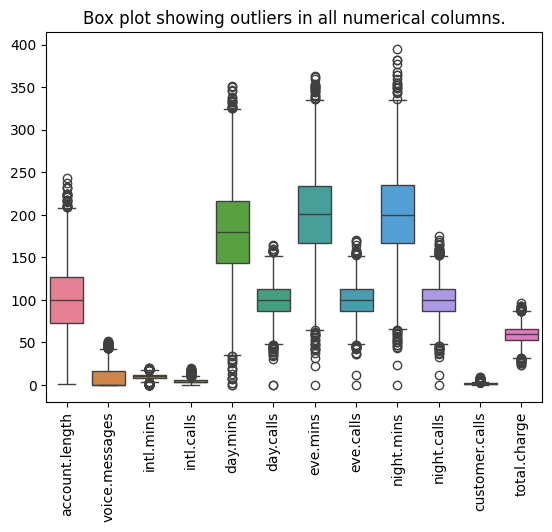

In [23]:
# Let's visualize these outliers using boxplots before removing
sns.boxplot(df)
plt.title("Box plot showing outliers in all numerical columns.")
plt.xticks(rotation=90)
plt.show()

In [24]:
def remove_outliers(df, columns):                        #function to remove outliers
    df_filtered = df.copy()                              # saving a copy
    for col in columns:                                  #running the loop for all the columns
        Q1 = df[col].quantile(0.25)                      #defining Q1
        Q3 = df[col].quantile(0.75)                      # defining Q3
        IQR = Q3 - Q1                                    #getting IQR
        lower_bound = Q1 - 1.5 * IQR                     # defining the lower bound
        upper_bound = Q3 + 1.5 * IQR                     #defining the upper bound
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]  # Keep rows within bounds

    return df_filtered

print("Dataset size before removing outliers:", df.shape)
df = remove_outliers(df, num_cols)                           # Pass all numeric columns at once
print("Dataset size after removing outliers:", df.shape)


Dataset size before removing outliers: (4969, 17)
Dataset size after removing outliers: (4105, 17)


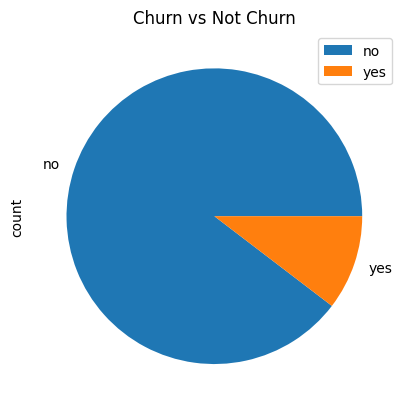

In [26]:
# Let's check if there is any class imbalance

df['churn'].value_counts().plot(kind = 'pie', legend=True)
plt.title("Churn vs Not Churn")
plt.show()

We can see there is a large class imbalance.

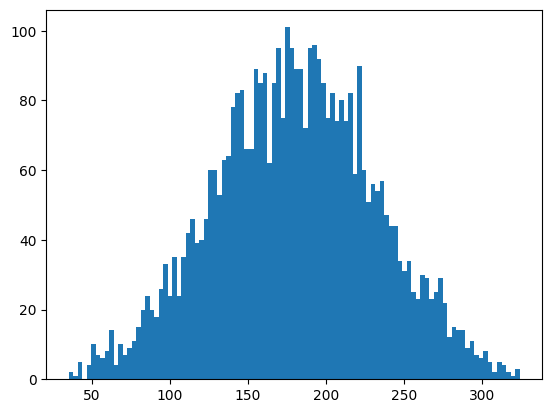

In [27]:
#visulaise the distribution of 'total day minutes'
plt.hist(df['day.mins'],bins=100)
plt.show()

Visulaising customer service call between churners and non-churners


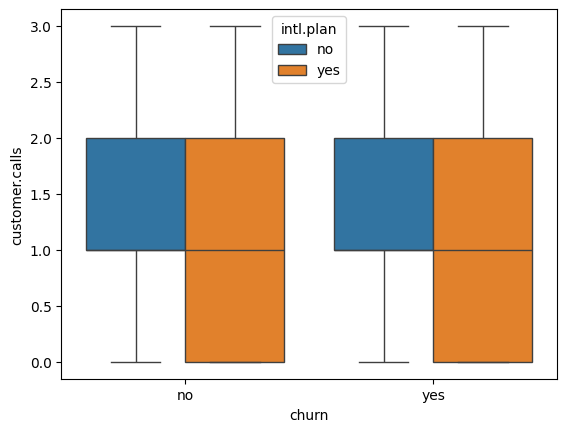

In [28]:
#create a box plot
sns.boxplot(x=df['churn'],y=df['customer.calls'],data=df,hue='intl.plan')

#display the plot
plt.show()

It looks like customers who do churn end up leaving more customer service calls unless these customers also have an international plan,

 in which case they leave fewer customer service calls.

This indicates that before churning customers try to resolve their queries.

In [29]:
# Encoding columns
d = {"yes":1, "no":0}
df = df.replace(d)

<ipython-input-29-8ee2cb004f83>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(d)


In [30]:
#Fixing area code with it's proper region numbers
df['area.code'] = df['area.code'].apply(lambda x: x.split('_')[2]).astype(int)

In [31]:
# Let's encode the state column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['state'] = le.fit_transform(df['state'])
df.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,total.charge
0,16,415,128,1,25,0,10.0,3,265.1,110,197.4,99,244.7,91,1,0,75.56
1,35,415,107,1,26,0,13.7,3,161.6,123,195.5,103,254.4,103,1,0,59.24
2,31,415,137,0,0,0,12.2,5,243.4,114,121.2,110,162.6,104,0,0,62.29
4,36,415,75,0,0,1,10.1,3,166.7,113,148.3,122,186.9,121,3,0,52.09
5,1,510,118,0,0,1,6.3,6,223.4,98,220.6,101,203.9,118,0,0,67.61


In [32]:
#feature extraction
x = df.drop('churn', axis=1)
y = df['churn']

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
# Handling class imbalance using SMOTE
# from imblearn.over_sampling import SMOTE

# print("Before handling class imbalance: ", y_train.value_counts())
# smote=SMOTE()
# x_train_s,y_train_s=smote.fit_resample(x_train,y_train)
# print("After handling class imbalance: ", y_train_s.value_counts())

In [35]:
# Let's scale our training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# MODEL BUILDING

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [37]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy Score", accuracy_score(model.predict(x_test_scaled), y_test))
print(classification_report(model.predict(x_test_scaled), y_test))

Accuracy Score 0.9695493300852619
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       765
           1       0.69      1.00      0.82        56

    accuracy                           0.97       821
   macro avg       0.85      0.98      0.90       821
weighted avg       0.98      0.97      0.97       821



In [39]:
# Save the main model
import pickle

with open('RFC_Model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# 3️⃣ Define parameter grid for tuning
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [None, 10, 20],  # Depth of each tree
    "criterion": ["gini", "entropy"],  # Splitting criterion
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split a node
}

In [ ]:
# 4️⃣ Perform Grid Search
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(x_train_scaled, y_train)

In [ ]:
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

In [ ]:
best_rf = grid_search.best_estimator_
print("Accuracy Score", accuracy_score(best_rf.predict(x_test_scaled), y_test))
print(classification_report(best_rf.predict(x_test_scaled), y_test))

In [40]:
from xgboost import XGBClassifier

xgb_mod = XGBClassifier()
xgb_mod.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, accuracy_score
print(accuracy_score(xgb_mod.predict(x_test_scaled), y_test))
print(classification_report(xgb_mod.predict(x_test_scaled), y_test))

In [ ]:
# # Define parameter grid
# param_grid = {
#     "n_estimators": [100, 200],
#     "learning_rate": [0.01, 0.1, 0.2],
#     "max_depth": [5, 7],
#     "subsample": [0.7, 1.0],
#     'gamma': [0, 0.1, 0.2],
#     "colsample_bytree": [0.7, 1.0],
#     'scale_pos_weight': [1, 4, 10]
# }

# # Fix: Explicitly set num_class
# xgb_model = XGBClassifier(objective="multi:softmax", eval_metric="mlogloss",
#                               num_class=len(set(y)), random_state=42)

# # Grid Search CV
# grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
# grid_search.fit(x_train_scaled, y_train)

# # Get best parameters & train final model
# best_xgb = grid_search.best_estimator_

# # Evaluate the best model
# y_pred = best_xgb.predict(x_test_scaled)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"\nBest Model Accuracy: {accuracy:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# grid_search.best_params_

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(x_train_scaled, y_train)

In [ ]:
print(accuracy_score(lgbm.predict(x_test_scaled), y_test))
print(classification_report(lgbm.predict(x_test_scaled), y_test))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train_scaled, y_train)
print(accuracy_score(gbc.predict(x_test_scaled), y_test))
print(classification_report(gbc.predict(x_test_scaled), y_test))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train_scaled, y_train)
print(accuracy_score(abc.predict(x_test_scaled), y_test))
print(classification_report(abc.predict(x_test_scaled), y_test))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)

print(accuracy_score(lr.predict(x_test_scaled), y_test))
print(classification_report(lr.predict(x_test_scaled), y_test))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

print(accuracy_score(knn.predict(x_test_scaled), y_test))
print(classification_report(knn.predict(x_test_scaled), y_test))

In [ ]:
from sklearn.svm import SVC

svc=SVC(C=2.0,kernel='rbf',gamma=0.1)
svc.fit(x_train_scaled, y_train)

print(accuracy_score(svc.predict(x_test_scaled), y_test))
print(classification_report(svc.predict(x_test_scaled), y_test))

### Model Accuracy Comparison

| Model                               | Accuracy Score          |
|--------------------------------------|-------------------------|
| Random Forest Classifier            | 0.9695                  |
| Grid-searched Random Forest         | 0.9683                     |
| XGBoost (XGB)                        | 0.9683                  |
| Grid-searched XGBoost               | 0.9695                  |
| LightGBM (LGBM)                      | 0.9695                  |
| Gradient Boosting Classifier         | 0.9671                  |
| AdaBoost                             | 0.9403                  |
| Logistic Regression (LR)             | 0.9184                  |
| K-Nearest Neighbors (KNN)            | 0.9172                  |
| Support Vector Machine (SVM)         | 0.9464                  |

### Best Model:
* The best model based on accuracy is **Random Forest Classifier, Grid-searched XGBoost, and LightGBM**, all achieving **0.9695** accuracy.
* **WE ARE FINALIZING WITH RANDOM FOREST CLASSIFIER**

# MODEL EVALUATION FOR RANDOM FOREST CLASSIFIER

In [61]:
# Classification Report
print(classification_report(model.predict(x_test_scaled), y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       765
           1       0.69      1.00      0.82        56

    accuracy                           0.97       821
   macro avg       0.85      0.98      0.90       821
weighted avg       0.98      0.97      0.97       821



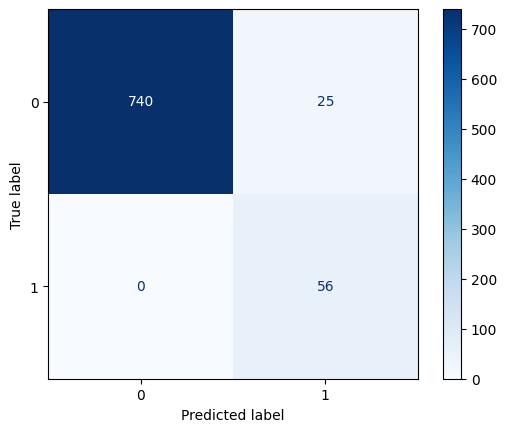

In [62]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(model.predict(x_test_scaled), y_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='Blues')
plt.show()

In [65]:
#Getting feature importance of the model
feature_importances = model.feature_importances_
feature_names = list(x.columns)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

           Feature  Importance
15    total.charge    0.291509
5        intl.plan    0.125595
8         day.mins    0.119469
6        intl.mins    0.064940
7       intl.calls    0.061744
4   voice.messages    0.054953
10        eve.mins    0.050077
3       voice.plan    0.045425
12      night.mins    0.036002
2   account.length    0.030836
9        day.calls    0.027418
13     night.calls    0.026017
11       eve.calls    0.025235
0            state    0.024260
14  customer.calls    0.008941
1        area.code    0.007578


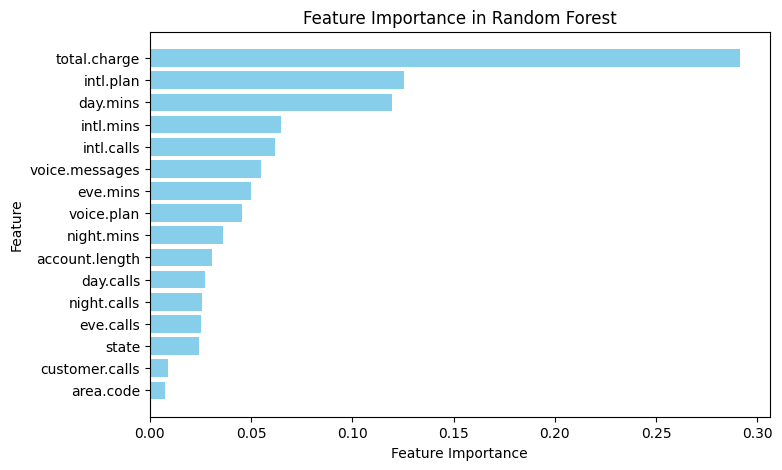

In [66]:
# plotting feature importance

plt.figure(figsize=(8, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Invert for better visualization
plt.show()


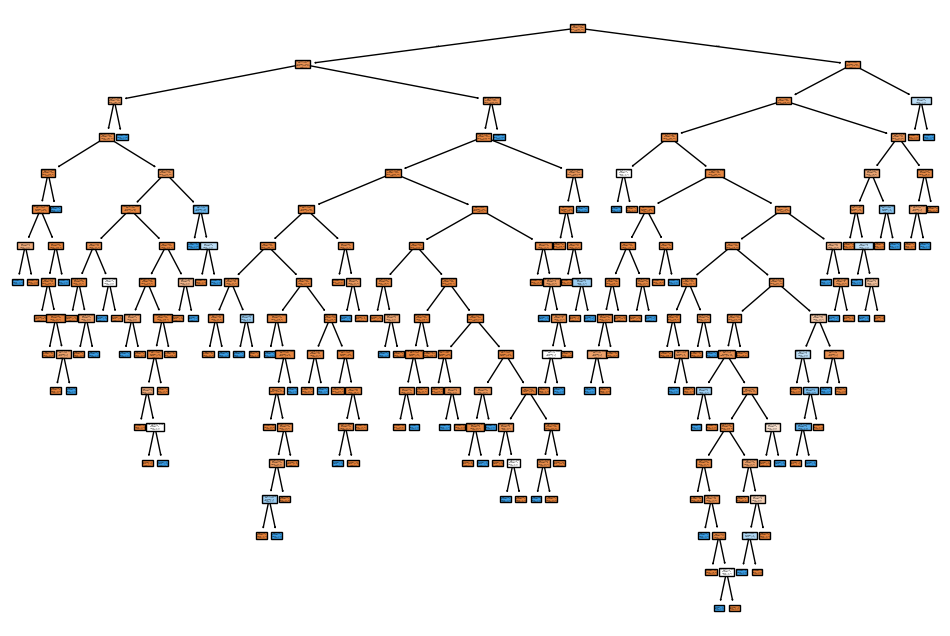

In [53]:
from sklearn.tree import plot_tree

single_tree = model.estimators_[0]
plt.figure(figsize=(12, 8))
plot_tree(single_tree, filled=True, feature_names=feature_names, class_names=['0','1'])
plt.show()

# **DEPLOYMENT**

In [ ]:
le.classes_

In [ ]:
import pickle

with open('lbl_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

In [ ]:
# Loading the encoder form files and testing it.

with open('/content/lbl_encoder.pkl', 'rb') as file:
    loaded_encoder = pickle.load(file)

# Example usage
print(loaded_encoder.transform(['OH'])[0])

In [ ]:
# Saving the StandardScaler in the form of pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
with open('/content/scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

In [ ]:
var = loaded_encoder.transform(['WV'])[0]
var

In [ ]:
# new_df = pd.read_excel('/content/Churn.xlsx', sheet_name=0)
# new_data = ['IN', 415, 65, 0, 0, 0, 12.7, 6, ]
dtt = [49, 415, 152, 0, 0, 0, 14.7, 2, 184.2, 90, 256.8, 73, 213.6, 113, 3, 66.72]
len(dtt)

In [ ]:
# Example usage
dtt = [49, 415, 152, 0, 0, 0, 14.7, 2, 184.2, 90, 256.8, 73, 213.6, 113, 3, 66.72]
scaled_data = loaded_scaler.transform([dtt])
print(scaled_data)

In [ ]:
print(model.predict(scaled_data))

In [42]:
with open('/content/RFC_Model.pkl', 'rb') as file:
    MODEL = pickle.load(file)

In [ ]:
# print(MODEL.predict(scaled_data)[0])
input_data_scaled = loaded_scaler.transform([dtt])

In [43]:
# Predict Button
# if st.button("Predict Churn"):
prediction = MODEL.predict(input_data_scaled)

    # Display Result
if prediction[0] == 1:
    print("This customer is likely to churn. ❌")
else:
    print("This customer is not likely to churn. ✅")


NameError: name 'input_data_scaled' is not defined

APP CODE USED IS:

In [70]:
# # APP CODE USED IS:

# import streamlit as st
# import pickle
# import numpy as np
# import time

# # Load Model, Encoder & Scaler
# with open('RFC_Model.pkl', 'rb') as file:
#     model = pickle.load(file)
# with open('lbl_encoder.pkl', 'rb') as file:
#     encoder = pickle.load(file)
# with open('scaler.pkl', 'rb') as file:
#     scaler = pickle.load(file)

# st.set_page_config(page_title="Customer Churn Prediction", layout="centered")
# st.image("https://thumbs.dreamstime.com/b/customer-churn-mark-charts-inscription-293698142.jpg", use_container_width=True)

# # Custom Styling
# st.markdown("""
#     <h1 style='text-align: center; color: #4CAF50;'>Customer Churn Prediction</h1>
#     <p style='text-align: center;'>Enter customer details to predict churn.</p>
#     <hr style='border: 1px solid #4CAF50;'>
# """, unsafe_allow_html=True)

# # App Title
# st.markdown("<h1>📊 Customer Churn Prediction</h1>", unsafe_allow_html=True)
# st.write("Enter customer details below to predict churn.")

# # Input Section
# st.markdown("---")
# st.subheader("🔹 Customer Details")

# # Input Fields (Better UI with Cards)
# with st.container():
#     state = st.selectbox("🌍 State Code",
#                          ['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT', 'NY',
#                           'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'NE', 'WY', 'HI', 'IL', 'NH', 'GA',
#                           'AK', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM',
#                           'NV', 'DC', 'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'])

#     state_encoded = encoder.transform([state])

#     area_code = st.selectbox("📞 Area Code", ['415', '408', '510'])
#     account_length = st.number_input("📆 Account Length (Days)", min_value=1, max_value=205, step=1)

#     voice_plan = st.radio("📢 Voice Plan", ["No", "Yes"])
#     voice_messages = st.slider("📩 Voice Messages", min_value=0, max_value=42, step=1)

#     intl_plan = st.radio("🌎 International Plan", ["No", "Yes"])
#     intl_mins = st.number_input("⏳ International Minutes", min_value=3.3, max_value=17.2, step=0.1, format="%.2f")
#     intl_calls = st.slider("📞 International Calls", min_value=1, max_value=10, step=1)

#     day_mins = st.number_input("🌞 Day Minutes", min_value=0.0, max_value=351.5, step=1.0, format="%.2f")
#     day_calls = st.slider("📲 Day Calls", min_value=0, max_value=165, step=1)

#     eve_mins = st.number_input("🌙 Evening Minutes", min_value=0.0, max_value=363.7, step=1.0, format="%.2f")
#     eve_calls = st.slider("📞 Evening Calls", min_value=0, max_value=170, step=1)

#     night_mins = st.number_input("🌜 Night Minutes", min_value=0.0, max_value=395.0, step=1.0, format="%.2f")
#     night_calls = st.slider("📱 Night Calls", min_value=0, max_value=175, step=1)

#     customer_calls = st.slider("📞 Customer Service Calls", min_value=0, max_value=9, step=1)
#     total_charge = st.number_input("💰 Gross Total Charges", min_value=31.0, max_value=87.0, step=0.1, format="%.2f")

# # Convert Inputs
# area_code = int(area_code)
# voice_plan = 1 if voice_plan == "Yes" else 0
# intl_plan = 1 if intl_plan == "Yes" else 0

# # Prepare Data for Prediction
# input_data = np.array([[float(state_encoded[0]), float(area_code), float(account_length),
#                         float(voice_plan), float(voice_messages), float(intl_plan), float(intl_mins), float(intl_calls),
#                         float(day_mins), float(day_calls), float(eve_mins), float(eve_calls),
#                         float(night_mins), float(night_calls), float(customer_calls), float(total_charge)]])
# input_data_scaled = scaler.transform(input_data)

# # Predict Button with Loading Animation
# if st.button("🔍 Predict Churn"):
#     with st.spinner("Analyzing customer data..."):
#         time.sleep(1)  # Short delay for loading animation
#         prediction = model.predict(input_data_scaled)

#     # Display Result with Icon
#     if prediction[0] == 1:
#         st.error("❌ This customer is **likely** to churn.")
#     else:
#         st.success("✅ This customer is **not likely** to churn.")

# # Footer
# st.markdown("---")
# st.markdown("<h5 style='text-align:center;'>Developed with ❤️ using Streamlit</h5>", unsafe_allow_html=True)
